## <i>Import libraries</i>

In [1]:
import pandas as pd
import mysql.connector as mysql

## Sambungkan ke MySQL

In [2]:
koneksi = mysql.connect(host = "localhost",
                        database = "kampus",
                        user = "root",
                        password = "Rakhid@16")

## Ambil tabel jurusan

In [3]:
cursor = koneksi.cursor()

# yang di eksekusi adalah query sql'nya
cursor.execute("SELECT * FROM jurusan")

tabel_jurusan = cursor.fetchall()
tabel_jurusan

[(1, 'informatika'),
 (2, 'mesin'),
 (3, 'kimia'),
 (4, 'statistika'),
 (5, 'matematika'),
 (6, 'geologi')]

## Ubah ke dalam DataFrame

In [6]:
data_jurusan  = pd.DataFrame(columns = ["ID", "Nama Jurusan"],
                            data = tabel_jurusan)

# Ubah kolom indeks
data_jurusan = data_jurusan.set_index('ID')
data_jurusan

,Nama Jurusan
ID,
1,informatika
2,mesin
3,kimia
4,statistika
5,matematika
6,geologi


In [9]:
data_jurusan['Nama Jurusan'] = data_jurusan['Nama Jurusan'].str.capitalize()
data_jurusan

,Nama Jurusan
ID,
1,Informatika
2,Mesin
3,Kimia
4,Statistika
5,Matematika
6,Geologi


## Lihat data tabel mahasiswa

In [10]:
# yang di eksekusi adalah query sql'nya
cursor.execute("SELECT * FROM mahasiswa")

tabel_mahasiswa = cursor.fetchall()
tabel_mahasiswa

[(1, 1, 'tommy', ' 10 maret 2000', 5165432, 'madura'),
 (2, 1, 'wahid', '20 mei 2000', 216543, 'sidoarjo'),
 (3, 1, 'ali kharozim', '03 januari 2000', 16543, 'pacitan'),
 (4, 2, 'hanif', '10 agustus 2000', 16546, 'boyolali'),
 (5, 3, 'yudha', '09 november 2000', 216546, 'magetan'),
 (6, 4, 'zain', '25 desember 2000', 16546, 'surabaya'),
 (7, 5, 'aji', '06 oktober 2000', 16546, 'gresik'),
 (8, 6, 'sumiati', '17 februari 2000', 16546, 'klaten'),
 (9, 1, 'romi', '18 april 2000', 16546, 'magelang'),
 (10, 2, 'ridho', '19 mei 2000', 56164, 'bangkalan'),
 (11, 6, 'fincent', '26 februari 2001', 21654, 'arosbaya'),
 (12, 1, 'darul', '17 september 2001', 21563, 'blega'),
 (13, 3, 'ulum', '14 februari 1999', 2654, 'kamal'),
 (14, 5, 'simbah', '19 april 2000', 16464, 'jakarta'),
 (15, 3, 'logitech', '12 desember 2012', 16544, 'surabaya'),
 (16, 2, 'mastekno', '31 desember 2012', 15654, 'jogja'),
 (17, 4, 'lentik', '29 oktober 2000', 215664, 'surakarta'),
 (18, 5, 'math heri', '18 juni 2000', 5562

In [16]:
tabel_mahasiswa[0][2]

'tommy'

## Ubah ke dalam DataFrame

In [17]:
data_mahasiswa  = pd.DataFrame(columns = ["ID MHS",
                                          "ID Jurusan",
                                          "Nama",
                                          "Tanggal lahir",
                                          "No Tel",
                                          "alamat"],
                               data = tabel_mahasiswa)

# Ubah kolom indeks
data_mahasiswa = data_mahasiswa.set_index('ID MHS')
data_mahasiswa

,ID Jurusan,Nama,Tanggal lahir,No Tel,alamat
ID MHS,,,,,
1,1,tommy,10 maret 2000,5165432,madura
2,1,wahid,20 mei 2000,216543,sidoarjo
3,1,ali kharozim,03 januari 2000,16543,pacitan
4,2,hanif,10 agustus 2000,16546,boyolali
5,3,yudha,09 november 2000,216546,magetan
6,4,zain,25 desember 2000,16546,surabaya
7,5,aji,06 oktober 2000,16546,gresik
8,6,sumiati,17 februari 2000,16546,klaten
9,1,romi,18 april 2000,16546,magelang


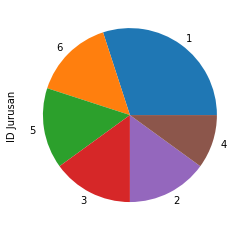

In [22]:
data_mahasiswa['ID Jurusan'].value_counts().plot(kind='pie')

## Buat <i>TABLE</i> baru

In [23]:
cursor.execute("CREATE TABLE mhs_baru "+
              "(id_mhs_baru INT(11) NOT NULL, "+
              "nama_jurusan VARCHAR(30) NOT NULL, "
              "nama_mhs VARCHAR(50) NOT NULL, " +
              "tanggal_lahir VARCHAR(30) NOT NULL)")

## JOIN TABLE

In [26]:
cursor.execute("SELECT mahasiswa.id_mhs, jurusan.nama_jurusan, mahasiswa.nama_mhs, mahasiswa.tgl_lahir "+
              "FROM mahasiswa INNER JOIN jurusan on jurusan.id_jurusan = mahasiswa.id_jurusan "+
              "ORDER BY mahasiswa.id_mhs")

tabel_baru = cursor.fetchall()
tabel_baru

[(1, 'informatika', 'tommy', ' 10 maret 2000'),
 (2, 'informatika', 'wahid', '20 mei 2000'),
 (3, 'informatika', 'ali kharozim', '03 januari 2000'),
 (4, 'mesin', 'hanif', '10 agustus 2000'),
 (5, 'kimia', 'yudha', '09 november 2000'),
 (6, 'statistika', 'zain', '25 desember 2000'),
 (7, 'matematika', 'aji', '06 oktober 2000'),
 (8, 'geologi', 'sumiati', '17 februari 2000'),
 (9, 'informatika', 'romi', '18 april 2000'),
 (10, 'mesin', 'ridho', '19 mei 2000'),
 (11, 'geologi', 'fincent', '26 februari 2001'),
 (12, 'informatika', 'darul', '17 september 2001'),
 (13, 'kimia', 'ulum', '14 februari 1999'),
 (14, 'matematika', 'simbah', '19 april 2000'),
 (15, 'kimia', 'logitech', '12 desember 2012'),
 (16, 'mesin', 'mastekno', '31 desember 2012'),
 (17, 'statistika', 'lentik', '29 oktober 2000'),
 (18, 'matematika', 'math heri', '18 juni 2000'),
 (19, 'informatika', 'august', '17 agustus 2000 '),
 (20, 'geologi', 'gempur sari', '18 juli 2000')]

## Masukan data hasil JOIN'an ke TABLE baru

In [27]:
for baris in tabel_baru:
    sql_query = "INSERT INTO mhs_baru VALUES (%s, %s, %s, %s)"
    cursor.execute(sql_query, baris)
    print(baris, "Telah dimasukkan")
    koneksi.commit()

(1, 'informatika', 'tommy', ' 10 maret 2000') Telah dimasukkan
(2, 'informatika', 'wahid', '20 mei 2000') Telah dimasukkan
(3, 'informatika', 'ali kharozim', '03 januari 2000') Telah dimasukkan
(4, 'mesin', 'hanif', '10 agustus 2000') Telah dimasukkan
(5, 'kimia', 'yudha', '09 november 2000') Telah dimasukkan
(6, 'statistika', 'zain', '25 desember 2000') Telah dimasukkan
(7, 'matematika', 'aji', '06 oktober 2000') Telah dimasukkan
(8, 'geologi', 'sumiati', '17 februari 2000') Telah dimasukkan
(9, 'informatika', 'romi', '18 april 2000') Telah dimasukkan
(10, 'mesin', 'ridho', '19 mei 2000') Telah dimasukkan
(11, 'geologi', 'fincent', '26 februari 2001') Telah dimasukkan
(12, 'informatika', 'darul', '17 september 2001') Telah dimasukkan
(13, 'kimia', 'ulum', '14 februari 1999') Telah dimasukkan
(14, 'matematika', 'simbah', '19 april 2000') Telah dimasukkan
(15, 'kimia', 'logitech', '12 desember 2012') Telah dimasukkan
(16, 'mesin', 'mastekno', '31 desember 2012') Telah dimasukkan
(17, 's

## Lihat isi TABLE baru dalam bentuk DataFrame

In [29]:
cursor.execute("SELECT * FROM mhs_baru")

mhs_baru = cursor.fetchall()

data_mhs_baru = pd.DataFrame(columns = ["ID", "Nama Jurusan", "Nama", "Tanggal Lahir"],
                            data = mhs_baru)

data_mhs_baru = data_mhs_baru.set_index("ID")
data_mhs_baru

,Nama Jurusan,Nama,Tanggal Lahir
ID,,,
1,informatika,tommy,10 maret 2000
2,informatika,wahid,20 mei 2000
3,informatika,ali kharozim,03 januari 2000
4,mesin,hanif,10 agustus 2000
5,kimia,yudha,09 november 2000
6,statistika,zain,25 desember 2000
7,matematika,aji,06 oktober 2000
8,geologi,sumiati,17 februari 2000
9,informatika,romi,18 april 2000


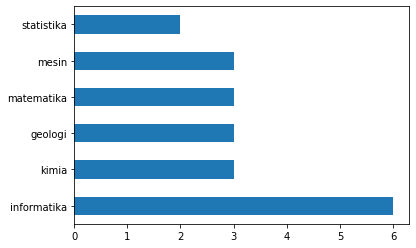

In [31]:
data_mhs_baru['Nama Jurusan'].value_counts().plot(kind='barh')